In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
# 글꼴을 바꿔라
matplotlib.rcParams['font.family'] = 'Malgun Gothic'
# 유니코드를 적용해라
matplotlib.rcParams['axes.unicode_minus'] = False

In [109]:
data = {'kor':[80,30,50,70],'eng':[20,90,90,80],'math':[33,44,55,66]}
df = pd.DataFrame(data,index=['aa','bb','cc','dd'])
df

,kor,eng,math
aa,80,20,33
bb,30,90,44
cc,50,90,55
dd,70,80,66


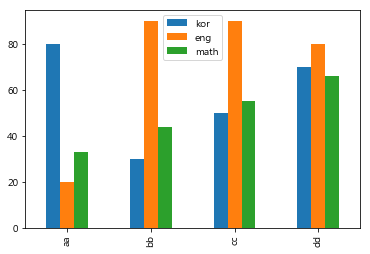

In [110]:
df.plot(kind='bar')
plt.show()

In [190]:
# engine='python' => 인코딩하는 방법
df = pd.read_csv('crime_in_seoul.csv',index_col ='관서명',engine='python')
# df = df.apply(pd.to_numeric)
df

,살인 발생,살인 검거,강도 발생,강도 검거,강간 발생,강간 검거,절도 발생,절도 검거,폭력 발생,폭력 검거
관서명,,,,,,,,,,
중부서,2,2,3,2,105,65,"1,395",477,"1,355","1,170"
종로서,3,3,6,5,115,98,"1,070",413,"1,278","1,070"
남대문서,1,0,6,4,65,46,"1,153",382,869,794
서대문서,2,2,5,4,154,124,"1,812",738,"2,056","1,711"
혜화서,3,2,5,4,96,63,"1,114",424,"1,015",861
용산서,5,5,14,14,194,173,"1,557",587,"2,050","1,704"
성북서,2,2,2,1,86,71,953,409,"1,194","1,015"
동대문서,5,5,13,13,173,146,"1,981",814,"2,548","2,227"
마포서,8,8,14,10,294,247,"2,555",813,"2,983","2,519"


### 2조 연습문제
* 1. 모든 관할 부서의 범죄 발생 총 건수를 구하시오
* 2. 각 범죄별 검거율을 구해보시오
* 3. 각 지역별 검거율을 구해보시오
* 4. 각 지역별 범죄 발생률을 구하시오
* 5. 범죄의 발생률이 가장 높은 지역 3개를 뽑으시오
* 6. 검거율이 가장 높은 지역 3개를 뽑으시오
* 7. 검거율이 가장 낮은 지역 3개를 뽑아보시오

In [112]:
total_crime = df.iloc[0:,[0,2,4,6,8]].sum().sum()
total_crime

126401

In [122]:
# 살인 검거율
tmp = df.iloc[0:,[0,1]]
value = tmp['살인 검거'].sum()/tmp['살인 발생'].sum()  * 100
value
crime = pd.Series()
crime = crime.append(pd.Series([value],index = ['살인 검거율']))
crime

살인 검거율    93.865031
dtype: float64

In [123]:
# 강도 검거율
tmp = df.iloc[0:,[2,3]]
value = tmp['강도 검거'].sum()/tmp['강도 발생'].sum()  * 100
crime = crime.append(pd.Series([value],index = ['강도 검거율']))
crime

살인 검거율    93.865031
강도 검거율    91.666667
dtype: float64

In [124]:
# 강간 검거율
tmp = df.iloc[0:,[4,5]]
value = tmp['강간 검거'].sum()/tmp['강간 발생'].sum()  * 100
crime = crime.append(pd.Series([value],index = ['강간 검거율']))
crime

살인 검거율    93.865031
강도 검거율    91.666667
강간 검거율    75.077996
dtype: float64

In [125]:
# 절도 검거율
tmp = df.iloc[0:,[6,7]]
value = tmp['절도 검거'].sum()/tmp['절도 발생'].sum()  * 100
crime = crime.append(pd.Series([value],index = ['절도 검거율']))
crime

살인 검거율    93.865031
강도 검거율    91.666667
강간 검거율    75.077996
절도 검거율    38.935397
dtype: float64

In [126]:
# 폭력 검거율
tmp = df.iloc[0:,[8,9]]
value = tmp['폭력 검거'].sum()/tmp['폭력 발생'].sum()  * 100
crime = crime.append(pd.Series([value],index = ['폭력 검거율']))
crime

살인 검거율    93.865031
강도 검거율    91.666667
강간 검거율    75.077996
절도 검거율    38.935397
폭력 검거율    84.596510
dtype: float64

In [169]:
tmp = df[0:]
# df2 = df['살인 발생']+df['강도 발생']+df['강간 발생']+df['절도 발생']+df['폭력 발생']
# df2
tmp['검거율'] = (tmp['살인 검거']+tmp['강도 검거']+tmp['강간 검거']+tmp['절도 검거']+tmp['폭력 검거'])/(tmp['살인 발생']+tmp['강도 발생']+tmp['강간 발생']+tmp['절도 발생']+tmp['폭력 발생'])*100
tmp

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,살인 발생,살인 검거,강도 발생,강도 검거,강간 발생,강간 검거,절도 발생,절도 검거,폭력 발생,폭력 검거,검거율
관서명,,,,,,,,,,,
중부서,2,2,3,2,105,65,1395,477,1355,1170,60.000000
종로서,3,3,6,5,115,98,1070,413,1278,1070,64.279935
남대문서,1,0,6,4,65,46,1153,382,869,794,58.548233
서대문서,2,2,5,4,154,124,1812,738,2056,1711,64.010921
혜화서,3,2,5,4,96,63,1114,424,1015,861,60.635916
용산서,5,5,14,14,194,173,1557,587,2050,1704,65.000000
성북서,2,2,2,1,86,71,953,409,1194,1015,66.964685
동대문서,5,5,13,13,173,146,1981,814,2548,2227,67.902542
마포서,8,8,14,10,294,247,2555,813,2983,2519,61.445166


In [172]:
tmp.sort_values(by='검거율')[0:3]

,살인 발생,살인 검거,강도 발생,강도 검거,강간 발생,강간 검거,절도 발생,절도 검거,폭력 발생,폭력 검거,검거율
관서명,,,,,,,,,,,
방배서,1,2,1,1,59,56,653,186,547,491,58.366376
관악서,9,8,12,14,320,221,2706,827,3298,2642,58.502758
남대문서,1,0,6,4,65,46,1153,382,869,794,58.548233


In [164]:
tmp = df[0:]
tmp['발생률'] = ((tmp['살인 발생']+tmp['강도 발생'] +tmp['강간 발생'] +tmp['절도 발생'] +tmp['폭력 발생']) / total_crime)*100
tmp
# total_crime

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,살인 발생,살인 검거,강도 발생,강도 검거,강간 발생,강간 검거,절도 발생,절도 검거,폭력 발생,폭력 검거,발생률
관서명,,,,,,,,,,,
중부서,2,2,3,2,105,65,1395,477,1355,1170,2.262640
종로서,3,3,6,5,115,98,1070,413,1278,1070,1.955681
남대문서,1,0,6,4,65,46,1153,382,869,794,1.656632
서대문서,2,2,5,4,154,124,1812,738,2056,1711,3.187475
혜화서,3,2,5,4,96,63,1114,424,1015,861,1.766600
용산서,5,5,14,14,194,173,1557,587,2050,1704,3.022128
성북서,2,2,2,1,86,71,953,409,1194,1015,1.769764
동대문서,5,5,13,13,173,146,1981,814,2548,2227,3.734148
마포서,8,8,14,10,294,247,2555,813,2983,2519,4.631292
